In [100]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

help(make_blobs)


Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

# KNN

In [101]:
X, y = make_blobs(n_samples=1500, centers=4, n_features=2, cluster_std=1, random_state=345)


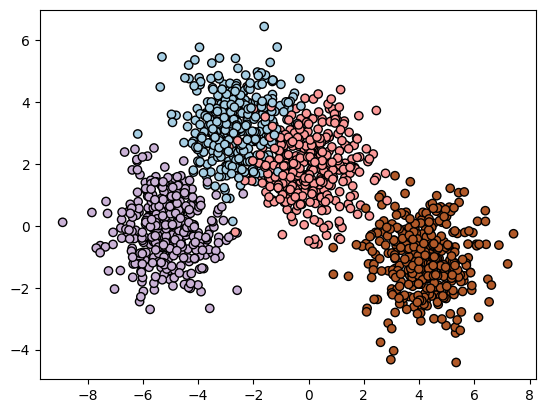

In [102]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=83)


In [104]:
kmeans = KMeans(n_clusters=4, random_state=564, n_init="auto").fit(X_train)
pred = kmeans.predict(X_test)

In [105]:
print(kmeans.inertia_)

1913.5683790626676


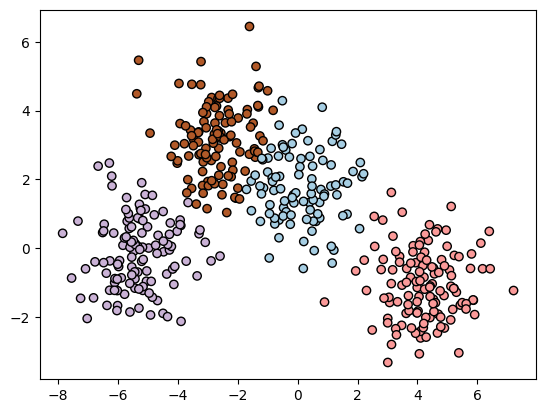

In [106]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred, edgecolors='k', cmap=plt.cm.Paired)


In [107]:
X, y = make_blobs(n_samples=1500, centers=5, n_features=2,
                  cluster_std=1, random_state=345)


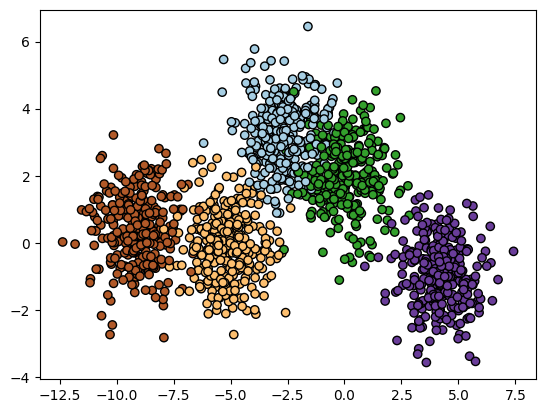

In [108]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)


In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=83)


In [110]:
kmeans = KMeans(n_clusters=5, random_state=564, n_init="auto").fit(X_train)
pred = kmeans.predict(X_test)


In [111]:
print(kmeans.inertia_)

1925.6026626680832


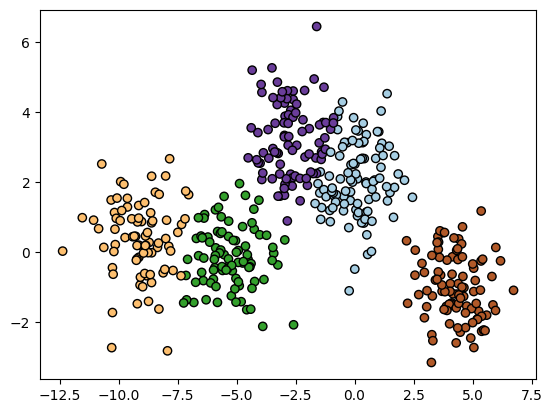

In [112]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred,
            edgecolors='k', cmap=plt.cm.Paired)


In [113]:
kmeans = KMeans(n_clusters=2, random_state=564, n_init="auto").fit(X_train)
pred = kmeans.predict(X_test)


In [114]:
print(kmeans.inertia_)

10178.99129109284


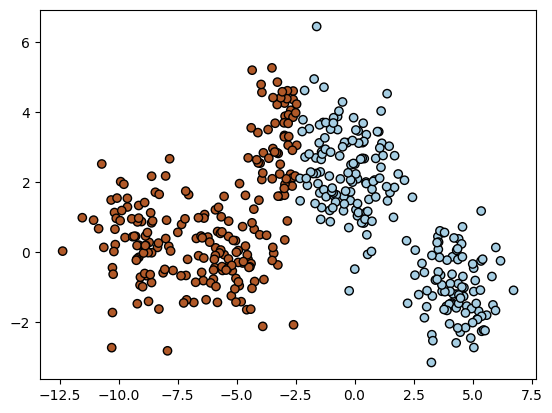

In [115]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred,
            edgecolors='k', cmap=plt.cm.Paired)


# Init=random

In [116]:
kmeans = KMeans(n_clusters=5, random_state=564, n_init="auto", init="random").fit(X_train)
pred = kmeans.predict(X_test)


In [118]:
print(kmeans.inertia_)

1925.6026626680832


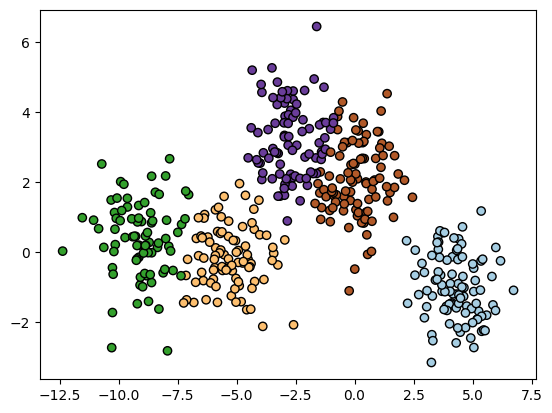

In [117]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred,
            edgecolors='k', cmap=plt.cm.Paired)


# Elbow

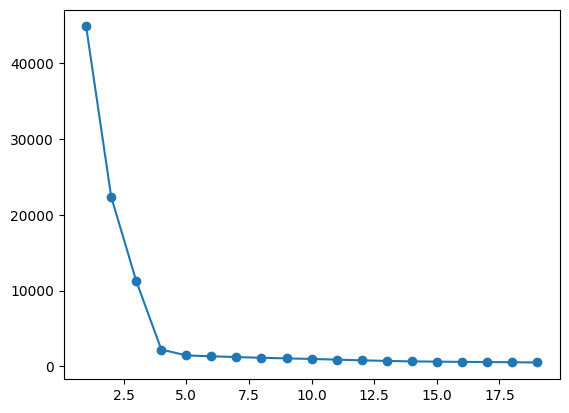

In [129]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=1, random_state=734)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=83)

inertia_values = [KMeans(n_clusters=i, random_state=564, n_init="auto").fit(
    X_train, y_train).inertia_ for i in range(1, 20)]
plt.plot(range(1, 20), inertia_values, marker='o')


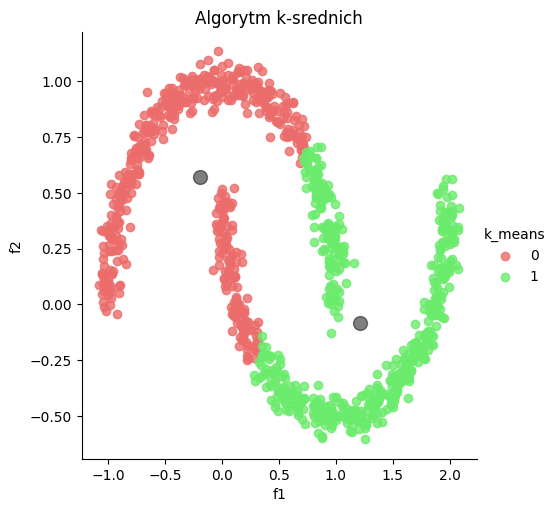

In [137]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd

x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns=['f1', 'f2'])
# TODO: Kmeans

kmeans = KMeans(n_clusters=2, random_state=564, n_init="auto").fit(
    x, y)

y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_

# Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue='k_means',
           palette=['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()


# Hierarchical methods